# Analyzing the Impact of Water Pollution on Waterborne Disease Prevalence


This project explores the relationship between water quality indicators and the prevalence of waterborne diseases (such as diarrhea, cholera, and typhoid) across countries and regions from 2000 to 2025. By leveraging the "Water Pollution and Disease" dataset, the analysis aims to identify patterns and correlations between contaminant levels, access to clean water, sanitation coverage, and public health outcomes. The project utilizes statistical analysis and data visualization to uncover key drivers of disease outbreaks and inform potential interventions.

Kaggle Dataset: [https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease](https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease)

Github Repo [https://github.com/casanchezbar/water_pollution_analysis](https://github.com/casanchezbar/water_pollution_analysis)

## Problem Statement
The core problem addressed is understanding how environmental water quality factors contribute to the incidence of waterborne diseases globally.

- Which water quality parameters (e.g., contaminant level, bacteria count, turbidity) are most strongly associated with disease outbreaks?
- How do socioeconomic and infrastructural factors (e.g., sanitation coverage, healthcare access, GDP per capita) modulate these relationships?

### Type of problem
- Primarily exploratory data analysis (EDA) and statistical correlation.
- The dataset is also suitable for supervised machine learning tasks, such as regression or classification, to predict disease incidence based on water and socioeconomic features

In [88]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import statsmodels.api as sm

# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error



# 1. Exploratory Data Analysis

In [81]:
# Load the data
df = pd.read_csv('/kaggle/input/water-pollution-and-disease/water_pollution_disease.csv')
# Display basic information
print('Dataframe info: \n')
display(df.info())

Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)         

None

In [82]:
# Clean Data

# drop columns not needed
# Water Treatment Method -> high nullability
# Country, Region, Year are irrelavant to our analysis
df = df.drop(['Water Treatment Method','Region','Country','Year'], axis=1)
df.rename(columns={
    'Water Source Type': 'water_source',
    'Contaminant Level (ppm)': 'contaminant_level',
    'pH Level': 'ph_level',
    'Turbidity (NTU)': 'turbidity',
    'Dissolved Oxygen (mg/L)': 'dissolved_oxygen',
    'Nitrate Level (mg/L)': 'nitrate_level',
    'Lead Concentration (µg/L)': 'lead_concentration',
    'Bacteria Count (CFU/mL)': 'bacteria_count',
    'Access to Clean Water (% of Population)': 'access_to_clean_water',
    'Diarrheal Cases per 100,000 people': 'diarrheal_cases',
    'Cholera Cases per 100,000 people': 'cholera_cases',
    'Typhoid Cases per 100,000 people': 'typhoid_cases',
    'Infant Mortality Rate (per 1,000 live births)': 'infant_mortality_rate',
    'GDP per Capita (USD)': 'gdp',
    'Healthcare Access Index (0-100)': 'healthcare_access',
    'Urbanization Rate (%)': 'urbanization_rate',
    'Sanitation Coverage (% of Population)': 'sanitation_coverage',
    'Rainfall (mm per year)': 'rainfall_per_year',
    'Temperature (°C)': 'temperature',
    'Population Density (people per km²)': 'population_density'
}, inplace=True)

df = pd.get_dummies(df, drop_first=True)

bool_cols = ['water_source_Pond', 'water_source_River', 'water_source_Spring', 'water_source_Tap', 'water_source_Well']
df[bool_cols] = df[bool_cols].astype(int)

In [57]:
df

,Year,contaminant_level,ph_level,turbidity,dissolved_oxygen,nitrate_level,lead_concentration,bacteria_count,access_to_clean_water,diarrheal_cases,...,sanitation_coverage,rainfall_per_year,temperature,population_density,Country_Mexico,water_source_Pond,water_source_River,water_source_Spring,water_source_Tap,water_source_Well
0,2015,6.06,7.12,3.93,4.28,8.28,7.89,3344,33.60,472,...,63.23,2800,4.94,593,True,0,0,0,0,0
1,2017,5.24,7.84,4.79,3.86,15.74,14.68,2122,89.54,122,...,29.12,1572,16.93,234,False,0,0,0,0,1
4,2005,0.12,8.16,4.22,9.15,49.35,12.51,4182,36.60,466,...,69.23,2295,31.44,414,True,0,0,0,0,1
7,2024,3.76,6.42,1.35,9.99,2.73,19.44,1172,44.17,397,...,70.22,940,19.64,111,True,0,0,1,0,0
10,2023,4.16,8.43,4.61,6.25,14.36,11.20,2129,41.68,286,...,25.37,1144,9.54,299,False,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2013,0.54,6.07,4.94,3.14,0.54,8.51,3749,92.09,200,...,34.48,774,23.56,134,True,0,0,0,1,0
2979,2001,9.51,8.30,0.76,6.66,40.00,0.85,4194,53.43,123,...,36.61,2661,0.29,848,True,0,0,0,0,1
2981,2005,0.28,6.50,3.40,3.52,47.75,13.19,1078,46.08,197,...,57.93,2055,37.68,598,False,0,0,0,0,0
2993,2009,1.98,7.71,1.26,6.30,41.30,13.18,1171,38.12,55,...,84.55,718,36.89,719,True,0,0,0,0,1


# Summary Statistics

In [84]:
print('Dataframe num summary statistics: \n')
display(df.describe())

# Display the first few rows
df.head()

Dataframe num summary statistics: 



,contaminant_level,ph_level,turbidity,dissolved_oxygen,nitrate_level,lead_concentration,bacteria_count,access_to_clean_water,diarrheal_cases,cholera_cases,...,urbanization_rate,sanitation_coverage,rainfall_per_year,temperature,population_density,water_source_Pond,water_source_River,water_source_Spring,water_source_Tap,water_source_Well
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,...,50.062480,60.371007,1591.849000,20.130917,505.390333,0.150000,0.179333,0.177333,0.167000,0.166000
std,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,...,22.779125,23.159678,817.502434,11.689244,283.275224,0.357131,0.383695,0.382014,0.373038,0.372143
min,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,...,10.030000,20.010000,200.000000,0.060000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,...,30.557500,40.440000,865.750000,9.840000,254.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,...,49.795000,60.580000,1572.000000,20.175000,513.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,...,69.727500,80.420000,2308.250000,30.672500,745.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,...,89.980000,99.990000,2999.000000,39.990000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,contaminant_level,ph_level,turbidity,dissolved_oxygen,nitrate_level,lead_concentration,bacteria_count,access_to_clean_water,diarrheal_cases,cholera_cases,...,urbanization_rate,sanitation_coverage,rainfall_per_year,temperature,population_density,water_source_Pond,water_source_River,water_source_Spring,water_source_Tap,water_source_Well
0,6.06,7.12,3.93,4.28,8.28,7.89,3344,33.60,472,33,...,84.61,63.23,2800,4.94,593,0,0,0,0,0
1,5.24,7.84,4.79,3.86,15.74,14.68,2122,89.54,122,27,...,73.37,29.12,1572,16.93,234,0,0,0,0,1
2,0.24,6.43,0.79,3.42,36.67,9.96,2330,35.29,274,39,...,72.86,93.56,2074,21.73,57,1,0,0,0,0
3,7.91,6.71,1.96,3.12,36.92,6.77,3779,57.53,3,33,...,71.07,94.25,937,3.79,555,0,0,0,0,1
4,0.12,8.16,4.22,9.15,49.35,12.51,4182,36.60,466,31,...,55.55,69.23,2295,31.44,414,0,0,0,0,1


## Data Visualization


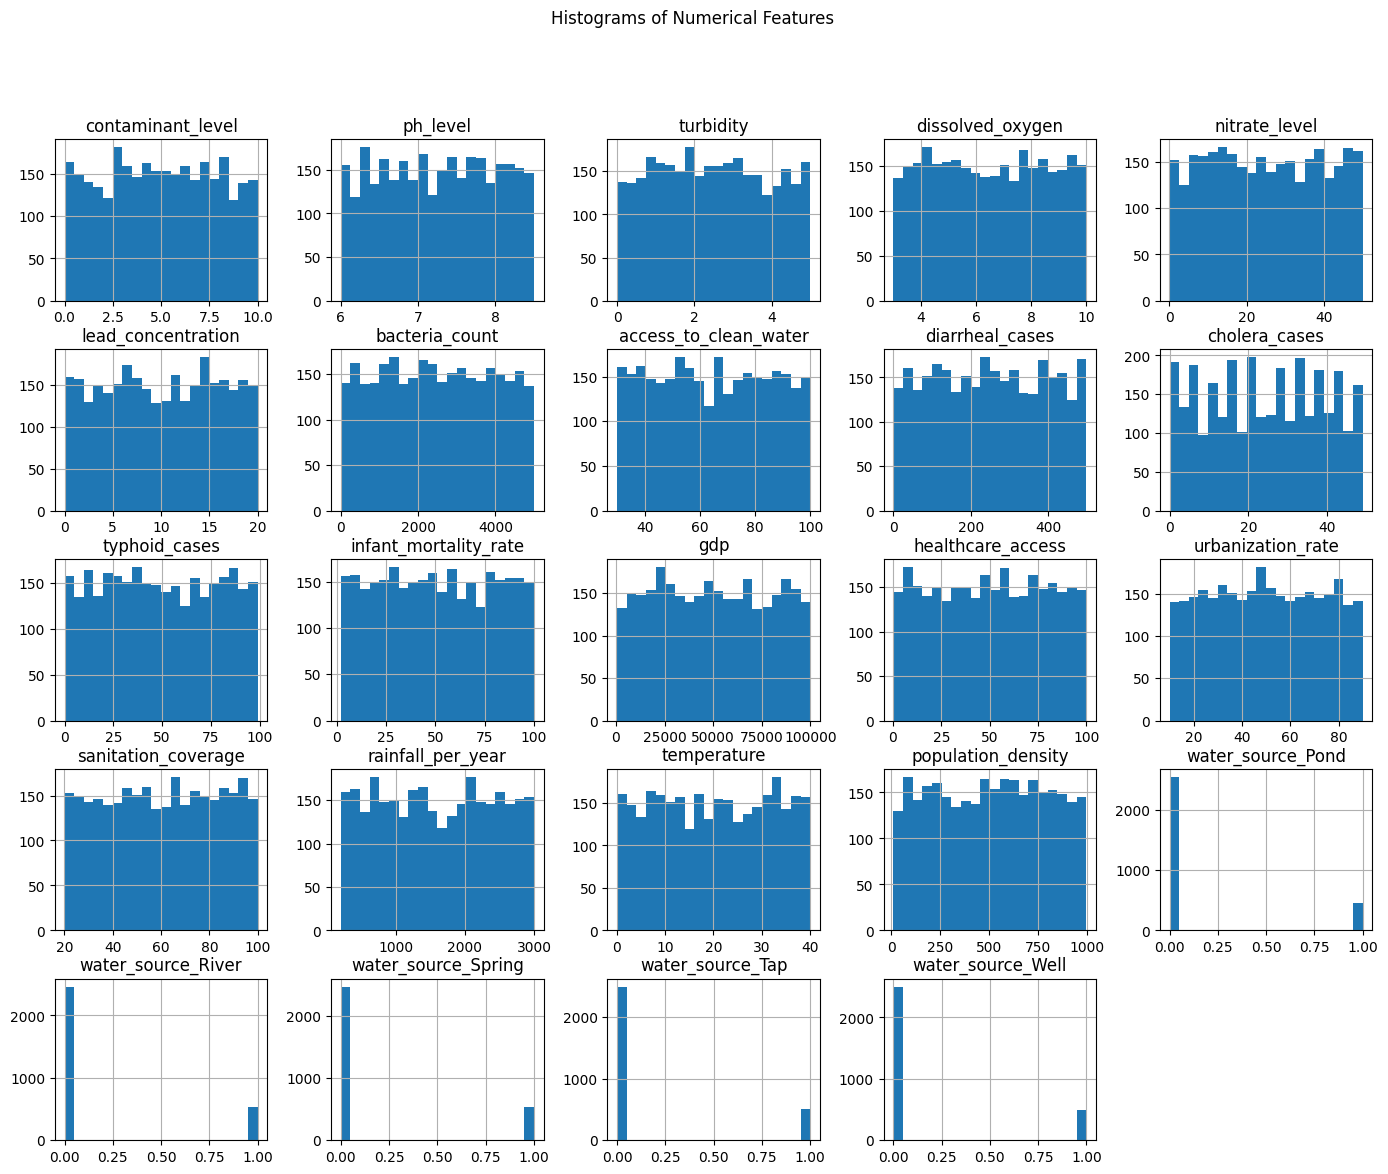

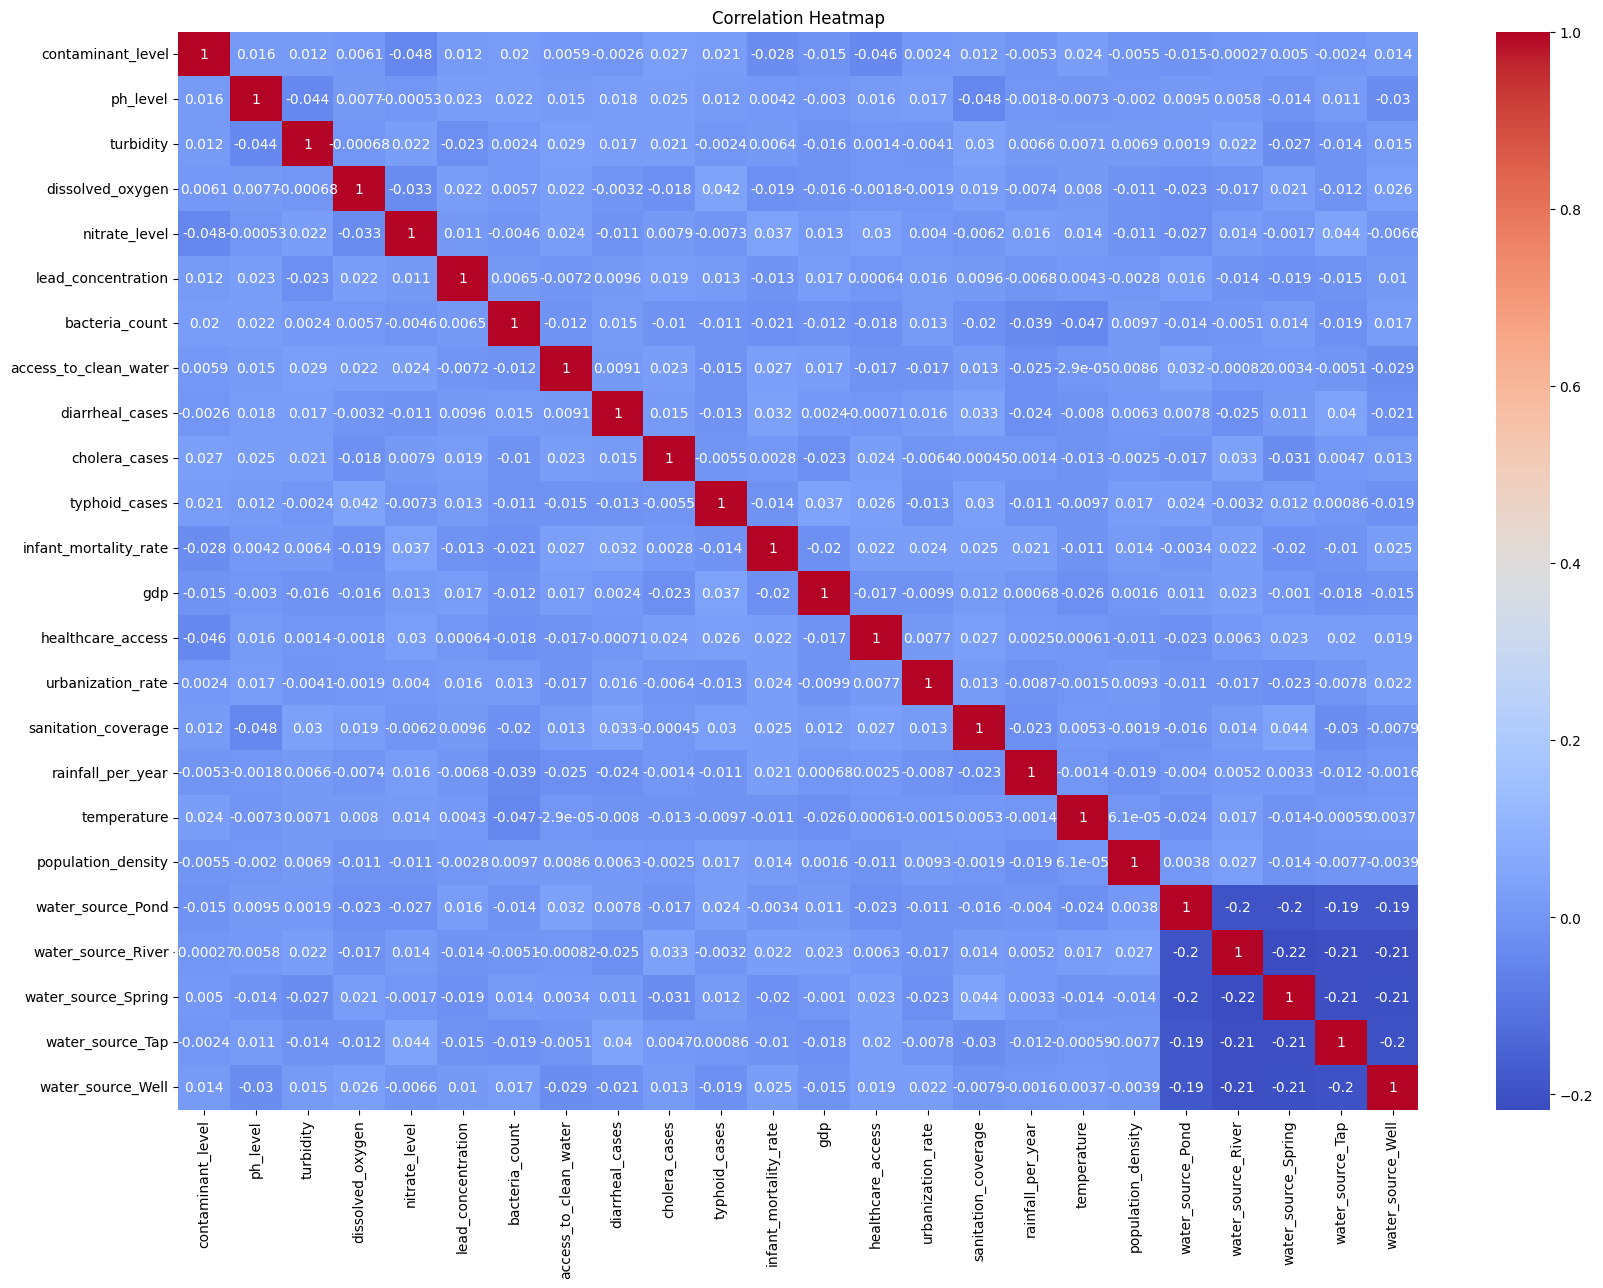

In [85]:
# Histograms
df.hist(figsize=(17, 13), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Modeling


### Water quality 

- **Selected features for water quality analysis**:
    - 'contaminant_level',
    - 'ph_level',
    - 'turbidity',
    - 'dissolved_oxygen',
    - 'nitrate_level',
    - 'lead_concentration',
    - 'bacteria_count',
    - 'access_to_clean_water',
    - 'diarrheal_cases',
    - 'cholera_cases',
    - 'typhoid_cases',

### Socioeconomic
- **Selected features for socioeconomic analysis**:
    - 'water_source',
    - 'access_to_clean_water'
    - 'infant_mortality_rate',
    - 'gdp',
    - 'healthcare_access',
    - 'urbanization_rate',
    - 'sanitation_coverage',
    - 'rainfall_per_year',
    - 'temperature'

In [89]:
water_quality_features = ['contaminant_level','ph_level','turbidity','dissolved_oxygen','nitrate_level', 'lead_concentration', 'bacteria_count', 'diarrheal_cases', 'cholera_cases','typhoid_cases',]
df_water_quality = df[water_quality_features]

socio_features = ['water_source_Pond','water_source_River','water_source_Spring','water_source_Tap','water_source_Well','access_to_clean_water','infant_mortality_rate','gdp','healthcare_access', 'urbanization_rate', 'sanitation_coverage','rainfall_per_year', 'temperature','diarrheal_cases','population_density', 'cholera_cases','typhoid_cases',]
df_socio = df[socio_features]

for decease in ['diarrheal','cholera','typhoid']:
    for current_df in [df_water_quality,df_socio]:
        # Define features and target for diarrheal
        X = current_df.drop(["diarrheal_cases",'cholera_cases','typhoid_cases'], axis=1)
        y = current_df[f"{decease}_cases"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
        model = sm.OLS(y_train, X_train)
        results = model.fit()
        print(results.summary())

        # Predict on test data
        y_pred = results.predict(X_test)
        
        # Evaluate on test data
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"Test R^2: {r2:.3f}")
        print(f"Test RMSE: {rmse:.3f}")


                                 OLS Regression Results                                
Dep. Variable:        diarrheal_cases   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1009.
Date:                Fri, 02 May 2025   Prob (F-statistic):                        0.00
Time:                        04:17:04   Log-Likelihood:                         -15345.
No. Observations:                2400   AIC:                                  3.070e+04
Df Residuals:                    2393   BIC:                                  3.075e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Water quality analysis

### Diarrheal Cases Model result
- Strong model fit with an uncentered R-squared of 0.747, indicating that approximately 74.7% of the variation in diarrheal_cases is explained by the model without including an intercept
- **ph_level**: Highly significant (p<0.001). Strong positive association: as pH increases by 1 unit, diarrheal cases increase by ~27.56 units, holding other factors constant.
- **turbidity**: Statistically significant (p=0.005). Positive effect: higher turbidity increases diarrheal cases.
- **dissolved_oxygen**: Marginally insignificant (p=0.081). Suggestive positive trend but not conclusive at 0.05 level.

### Cholera Cases Model result
- Model explains ~73.8% of the variance in cholera cases (without an intercept term)
- **contaminant_level**: Statistically significant (p<0.05); For each unit increase in contaminant level, cholera cases increase by 0.2012
- **ph_level**: Highly significant (p<0.001); Each unit increase in pH, cholera cases increase by ~2.5749
- **turbidity**: Statistically significant (p<0.05); Each unit increase in turbidity, cholera cases increase by 0.4944
- **lead_concentration**: Marginally significant (p slightly > 0.05); may warrant further exploration

### Typhoid Cases Model result
- Model explains ~73.9% of variance (no intercept)
- **ph_level**: Highly significant (p<0.001). Strong positive effect on typhoid cases.
- **dissolved_oxygen**: Statistically significant (p<0.001). Positive effect on typhoid cases.

## Socioeconomical Analysis

### Diarrheal Cases Model result
- Strong model fit with an uncentered R-squared of 0.739, indicating that approximately 73.9% of the variation in diarrheal_cases is explained by the model without including an intercept
- **water_source_Pond**: Significant, using pond water associated with ~35 more diarrheal cases compared to baseline.
- **water_source_River**: Significant; river water use linked to increased diarrheal cases.
- **water_source_Spring**: Significant; spring water use also associated with higher cases.
- **water_source_Tap**: Highly significant; tap water use linked to even higher diarrheal cases (possibly a data artifact or contamination issue).
- **water_source_Well**:Marginally significant; well water may be associated with increased cases.
- **access_to_clean_water**: Significant positive coefficient; counterintuitive and may indicate confounding or coding issues.
- **infant_mortality_rate**: Significant; higher infant mortality correlates with more diarrheal cases.
- **gdp**:Significant but very small effect size.
- **healthcare_access**: Significant; better healthcare access linked with increased reported cases (could reflect reporting bias).
- **urbanization_rate**: Significant; urbanization associated with higher diarrheal cases.
- **sanitation_coverage**: Significant; higher sanitation coverage surprisingly linked to more cases (may indicate confounding).
- **rainfall_per_year**: Significant; more rainfall associated with increased cases.
- **temperature**: Significant; higher temperature linked to more diarrheal cases.
- **population_density**: Significant; denser populations have more cases.



### Cholera Cases Model result
- Model explains ~72.8% of the variance in cholera cases (without an intercept term)
- All predictors have positive coefficients and are statistically significant, indicating consistent positive associations with the outcome.
- The water source variables show moderate increases in the outcome, suggesting that the type of water source significantly impacts the dependent variable.
- Socioeconomic and environmental factors like access to clean water, infant mortality, healthcare access, urbanization, sanitation, rainfall, temperature, and population density all have positive but varying effect sizes.
- The effect sizes for some variables (e.g., GDP, rainfall, population density) are small but statistically significant, likely reflecting subtle influences.cases.

### Typhoid Cases Model
- All predictors are statistically significant at the 5% level.
- Water source types have substantial positive associations with typhoid cases.
- Socioeconomic and environmental variables (access to clean water, infant mortality, healthcare access, urbanization, sanitation, rainfall, temperature, population density) all show positive effects.
- Positive coefficients for access to clean water and sanitation coverage might indicate:
- Reporting bias (better infrastructure areas report more cases)
- Confounding factors

## Conclusions
### Water Quality Analysis

#### Diarrheal Cases Model
- The model demonstrates a strong fit with an uncentered R-squared of 0.747, explaining approximately 74.7% of the variation in diarrheal cases without including an intercept.
- pH level is highly significant (p < 0.001) with a strong positive association: a 1-unit increase in pH corresponds to an increase of about 27.56 diarrheal cases, holding other factors constant.
- Turbidity is also statistically significant (p = 0.005), indicating that higher turbidity levels increase diarrheal cases.
- Dissolved oxygen shows a suggestive positive trend (p = 0.081) but is marginally insignificant at the 0.05 level.

#### Cholera Cases Model
- The model explains about 73.8% of the variance in cholera cases (uncentered R-squared).
- Contaminant level is statistically significant (p < 0.05), with each unit increase associated with a 0.2012 increase in cholera cases.
- pH level remains highly significant (p < 0.001), with a positive effect size of approximately 2.57 cases per unit increase.
- Turbidity is significant (p < 0.05), positively associated with cholera cases.
- Lead concentration is marginally significant (p slightly > 0.05), suggesting further investigation may be warranted.

#### Typhoid Cases Model
- The model explains approximately 73.9% of the variance (uncentered R-squared).
- Both pH level and dissolved oxygen are highly significant (p < 0.001), with positive effects on typhoid cases.

### Socioeconomic Analysis
#### Diarrheal Cases Model
- The model shows a strong fit with an uncentered R-squared of 0.739.
- Various water sources (pond, river, spring, tap, well) are significant predictors, with pond and tap water associated with notably higher diarrheal cases.
- Access to clean water has a significant positive coefficient, which is counterintuitive and may indicate confounding or data coding issues.
- Other significant socioeconomic factors include:
    - Infant mortality rate
    - GDP (small effect size)
    - Healthcare access (positive association possibly due to reporting bias)
    - Urbanization rate
    - Sanitation coverage (positive association, potentially confounded)
    - Rainfall per year
    - Temperature
    - Population density

#### Cholera Cases Model
- The model explains approximately 72.8% of the variance.
- All predictors have positive and statistically significant coefficients.
- Water source types moderately increase cholera cases, highlighting the impact of water quality.

- Socioeconomic and environmental factors (access to clean water, infant mortality, healthcare access, urbanization, sanitation, rainfall, temperature, population density) also positively influence cholera cases, though some effect sizes (e.g., GDP, rainfall) are small.

#### Typhoid Cases Model
- All predictors are statistically significant at the 5% level.
- Water source types show substantial positive associations with typhoid cases.
- Socioeconomic and environmental variables similarly exhibit positive effects.
- Positive coefficients for access to clean water and sanitation coverage may reflect:
- Reporting bias (areas with better infrastructure report more cases)
- Confounding factors requiring further study.
- Overall Insights: Water quality indicators such as pH, turbidity, contaminant levels, and dissolved oxygen play crucial roles in explaining the incidence of waterborne diseases.
- Socioeconomic and environmental factors significantly contribute to disease prevalence, but some counterintuitive findings (e.g., positive effects of clean water access and sanitation coverage) suggest the influence of confounding variables or reporting biases.

The models demonstrate strong explanatory power but highlight the need for careful interpretation and further investigation into data quality, confounding, and potential causal mechanisms.